# Grafici e Visualizzazioni con Matplotlib
- E' la libreria base di Python per creare grafici e visualizzazioni
- Integrazione con Pandas
- documentazione: https://matplotlib.org/

In [1]:
# partiamo importando la libreria che per convenzione comune ha alias "plt"

import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline 
# non e' codice python ma una "magic function" di Jupiter, utile per mostrare grafici direttamente nel notebook

In [2]:
fb = pd.read_csv("FB.csv", parse_dates= ["Date"], index_col = "Date").round(2)
fb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-16,185.05,188.58,185.05,186.99,186.99,12953100
2019-05-17,184.84,187.58,184.28,185.30,185.30,10485400
2019-05-20,181.88,184.23,181.37,182.72,182.72,10352000
2019-05-21,184.57,185.70,183.89,184.82,184.82,7502800
2019-05-22,184.73,186.74,183.61,185.32,185.32,9213800


In [3]:
nuovo_indice = pd.date_range(start = fb.index.min(), end = fb.index.max(), freq = "D")

fb = fb.reindex(nuovo_indice, method = "ffill")

In [4]:
fb.head(3)

,Open,High,Low,Close,Adj Close,Volume
2019-05-16,185.05,188.58,185.05,186.99,186.99,12953100
2019-05-17,184.84,187.58,184.28,185.30,185.30,10485400
2019-05-18,184.84,187.58,184.28,185.30,185.30,10485400


## Grafico a linee - Line plot

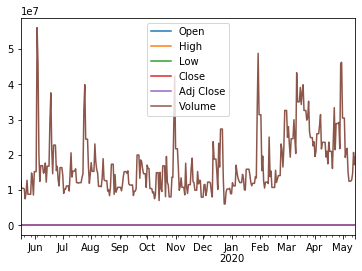

In [5]:
fb.plot()  
plt.show() # se non usi jupiter e vuoi visualizzare i tuoi grafici: simile alla funzione print()

#### parametro y per scegliere cosa graficare

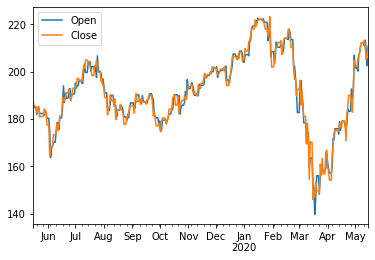

In [6]:
fb.plot(y = ["Open", "Close"])
plt.show()

#### subplots

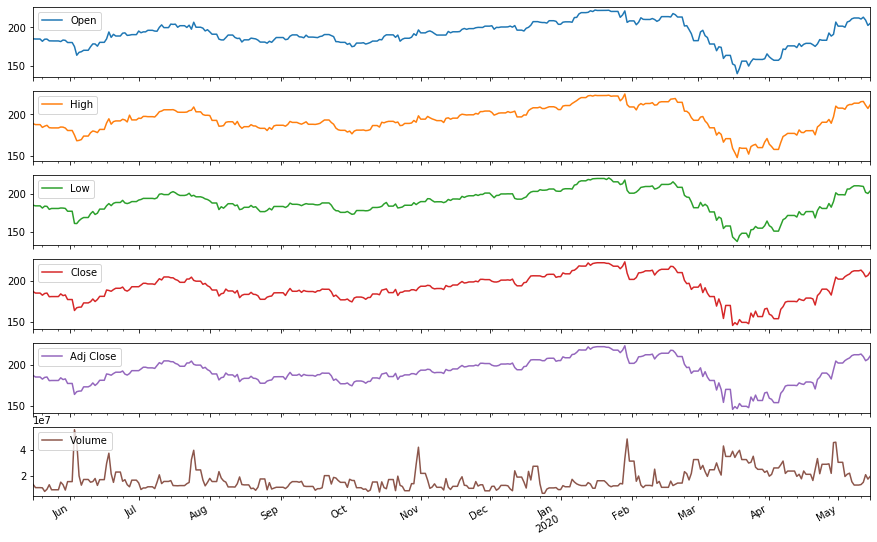

In [7]:
fb.plot(subplots = True, figsize = (15,10))

# figsize : tupla con (larghezza, altezza) in pollici

plt.show()

#### Legenda, titolo e grandezza dei caratteri

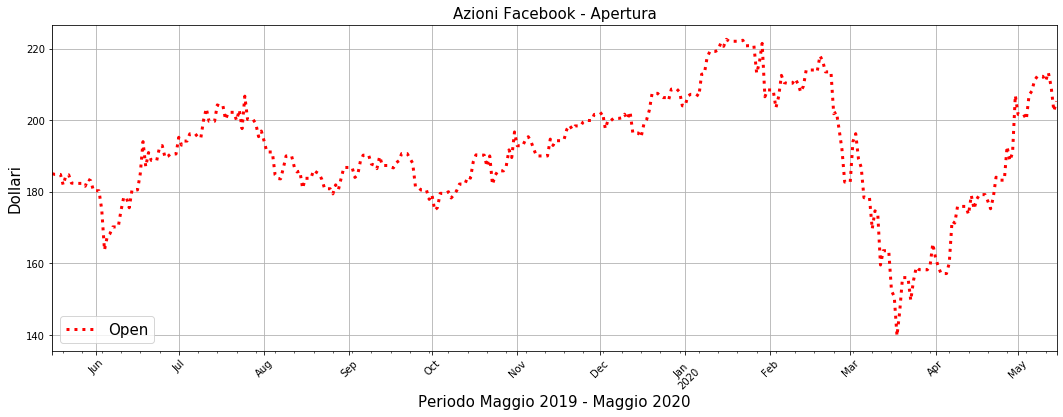

In [8]:
fb.plot(y = "Open", figsize = (18,6), c = "r", linewidth = 3, linestyle = ":", rot = 45)

plt.title("Azioni Facebook - Apertura", fontsize = 15)

plt.legend(loc = "lower left", fontsize = 15)

plt.xlabel("Periodo Maggio 2019 - Maggio 2020", fontsize = 15)

plt.ylabel("Dollari", fontsize = 15)

plt.grid()

plt.show()

# Grafico a barre - Bar chart

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
fb = pd.read_csv("FB.csv", parse_dates= ["Date"], index_col = "Date").round(2)

nuovo_indice = pd.date_range(start = fb.index.min(), end = fb.index.max(), freq = "D")

fb = fb.reindex(nuovo_indice, method = "ffill")
fb

,Open,High,Low,Close,Adj Close,Volume
2019-05-16,185.05,188.58,185.05,186.99,186.99,12953100
2019-05-17,184.84,187.58,184.28,185.30,185.30,10485400
2019-05-18,184.84,187.58,184.28,185.30,185.30,10485400
2019-05-19,184.84,187.58,184.28,185.30,185.30,10485400
2019-05-20,181.88,184.23,181.37,182.72,182.72,10352000
...,...,...,...,...,...,...
2020-05-11,210.89,215.00,210.37,213.18,213.18,12911900
2020-05-12,213.29,215.28,210.00,210.10,210.10,14704600
2020-05-13,209.43,210.78,202.11,205.10,205.10,20684600
2020-05-14,202.56,206.93,200.69,206.81,206.81,17178900


#### Visualizziamo i valori medi di chiusura (colonna "Close") delle azioni di Facebook durante periodo May 2019 - May2020

In [11]:
fb_mesi = fb.resample("M").mean()
fb_mesi.index = fb_mesi.index.month_name()

fb_mesi

,Open,High,Low,Close,Adj Close,Volume
May,183.180625,184.981250,181.912500,182.990000,182.990000,1.068291e+07
June,181.793667,184.025000,179.595333,181.935667,181.935667,2.008352e+07
July,199.210645,201.475161,196.998065,199.582581,199.582581,1.572368e+07
August,185.420645,187.095806,182.878387,184.556774,184.556774,1.348829e+07
September,186.553667,187.662333,183.934667,185.648667,185.648667,1.362014e+07
October,184.387742,186.573548,182.096774,184.438387,184.438387,1.376772e+07
November,195.345667,197.042000,194.109333,195.825667,195.825667,1.289797e+07
December,202.548065,203.706774,200.552258,202.157097,202.157097,1.379381e+07
January,216.316452,217.969677,214.480968,216.468387,216.468387,1.530365e+07
February,207.684138,210.101379,205.300345,207.808621,207.808621,1.716465e+07


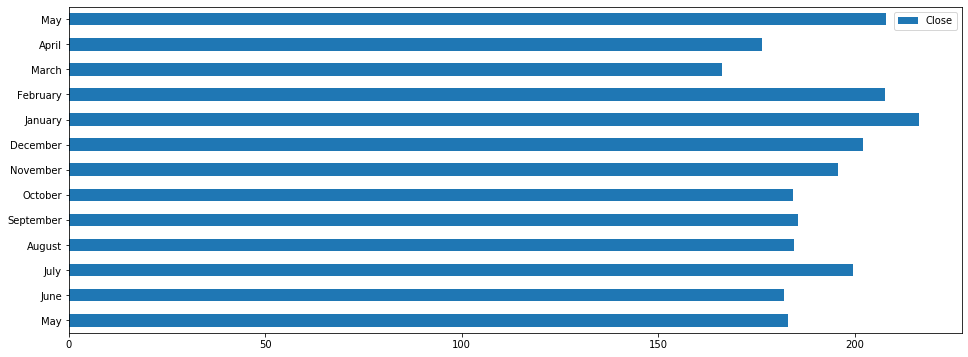

In [12]:
fb_mesi.plot(kind = "barh", y = "Close", figsize = (16,6))

plt.show()

## Istogrammi

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
titanic = pd.read_csv("titanic.csv", index_col = "PassengerId")
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [15]:
titanic["Age"].min()

0.42

In [16]:
titanic["Age"].max()

80.0

#### Osserviamo la distribuzione dell'eta' dei passeggeri tramite istogramma

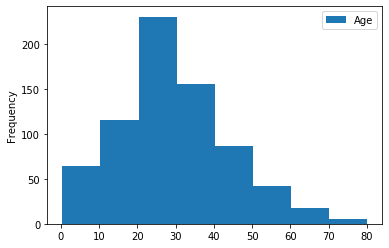

In [17]:
titanic.plot(kind = "hist", y = "Age", bins = 8)
plt.show()


#### Posso sfruttare direttamente Pandas per creare delle visualizzazioni

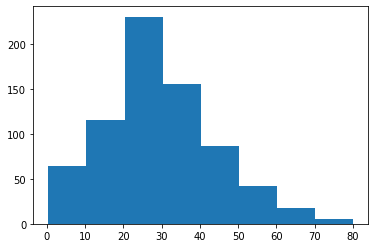

In [18]:
titanic["Age"].hist(bins = 8, grid = False) # 10 bins di defaults

## Grafico a torta - Pie chart

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
pop = pd.read_html("https://it.qwe.wiki/wiki/List_of_continents_by_population")[0]
pop

,Rango,Continente,popolazione 2018,±% pa 2010-2016,% Del pop mondiale.
0,-,Mondo,"7.632.819,325 mila","1,17%",100%
1,1,Asia,4.436.224 mila,"1,04%",59.69%
2,2,Africa,1.216.130 mila,"2,57%",16.36%
3,3,Europa,738.849.000,"0,08%","9,94%"
4,4,Nord America,579.024.000,"0,96%","7,79%"
5,5,Sud America,422.535.000,"1,04%","5,68%"
6,6,Oceania,38.304.000,"1,47%","0,54%"
7,7,Antartide,1.106,Sconosciuto,"<0,01%"


#### Vogliamo creare una pie chart dove ogni fetta della torta rappresenta la percentuale della popolazione mondiale di ogni continente

In [21]:
pop["% Del pop mondiale."] = pop["% Del pop mondiale."].str.strip("%").str.strip("<").str.replace(",", ".").astype(float)

In [22]:
pop

,Rango,Continente,popolazione 2018,±% pa 2010-2016,% Del pop mondiale.
0,-,Mondo,"7.632.819,325 mila","1,17%",100.00
1,1,Asia,4.436.224 mila,"1,04%",59.69
2,2,Africa,1.216.130 mila,"2,57%",16.36
3,3,Europa,738.849.000,"0,08%",9.94
4,4,Nord America,579.024.000,"0,96%",7.79
5,5,Sud America,422.535.000,"1,04%",5.68
6,6,Oceania,38.304.000,"1,47%",0.54
7,7,Antartide,1.106,Sconosciuto,0.01


In [23]:
labels = pop["Continente"].loc[1:6]
labels

1            Asia
2          Africa
3          Europa
4    Nord America
5     Sud America
6         Oceania
Name: Continente, dtype: object

In [24]:
dimensioni = pop["% Del pop mondiale."].loc[1:6]


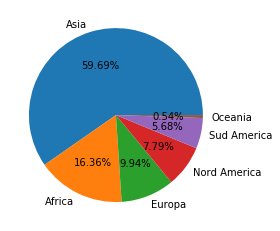

In [25]:
plt.pie(x = dimensioni, labels = labels, autopct = "%1.2f%%")

plt.show()

## Cambiare estetica con "style"

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

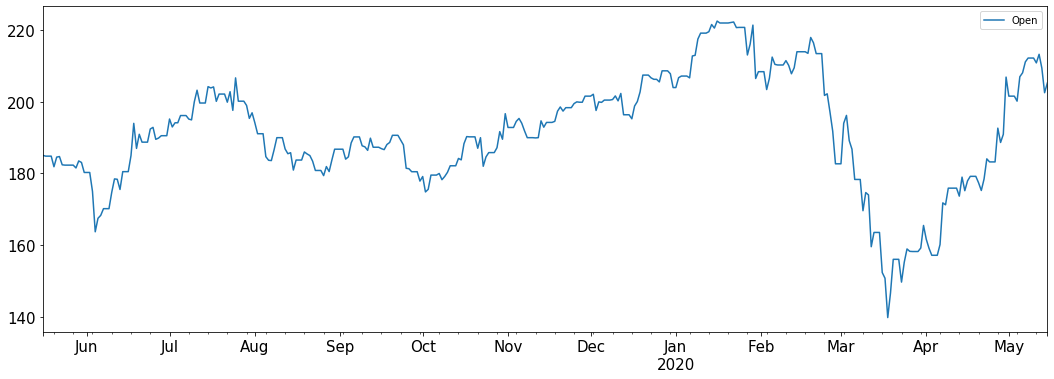

In [27]:
fb.plot(y = "Open", figsize = (18,6), fontsize = 15)
plt.show()

In [28]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

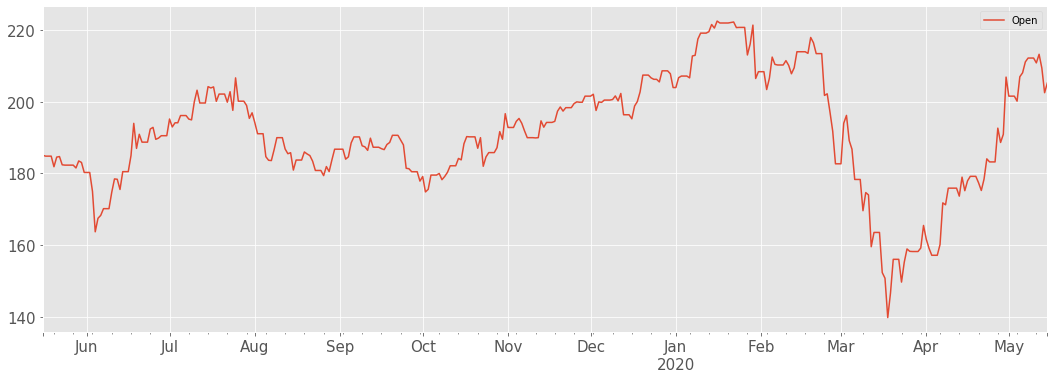

In [29]:
plt.style.use('ggplot')
fb.plot(y = "Open", figsize = (18,6), fontsize = 15)
plt.show()

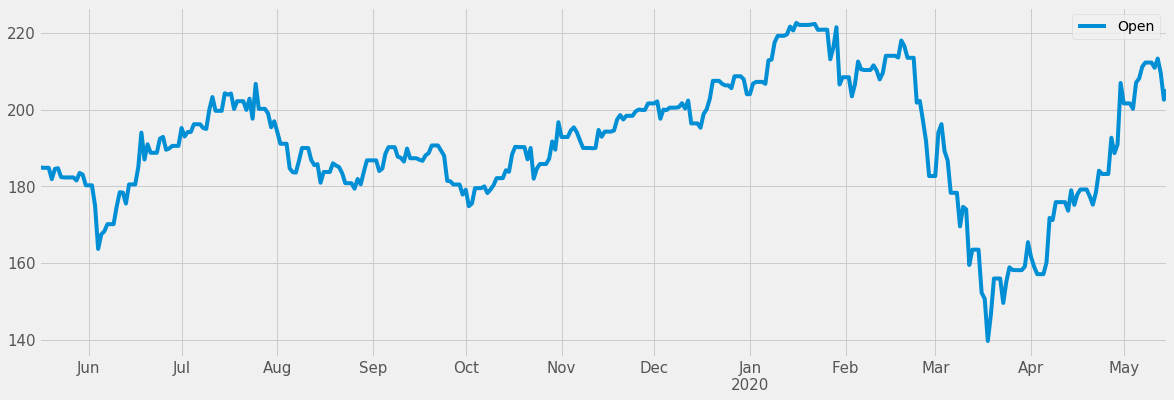

In [30]:
plt.style.use('fivethirtyeight')
fb.plot(y = "Open", figsize = (18,6), fontsize = 15)
plt.show()

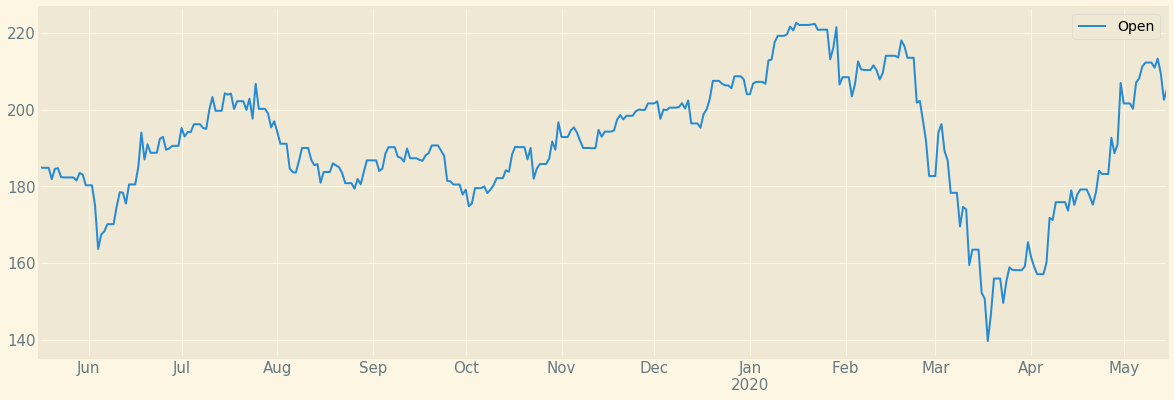

In [31]:
plt.style.use('Solarize_Light2')
fb.plot(y = "Open", figsize = (18,6), fontsize = 15)
plt.show()

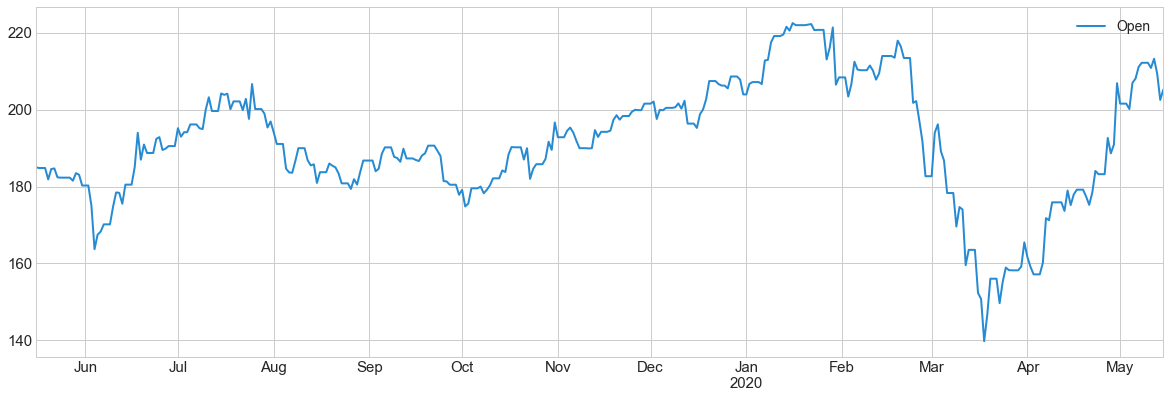

In [32]:
plt.style.use('seaborn-whitegrid')
fb.plot(y = "Open", figsize = (18,6), fontsize = 15)
plt.show()

#### Esempi dei diversi stili:

https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html